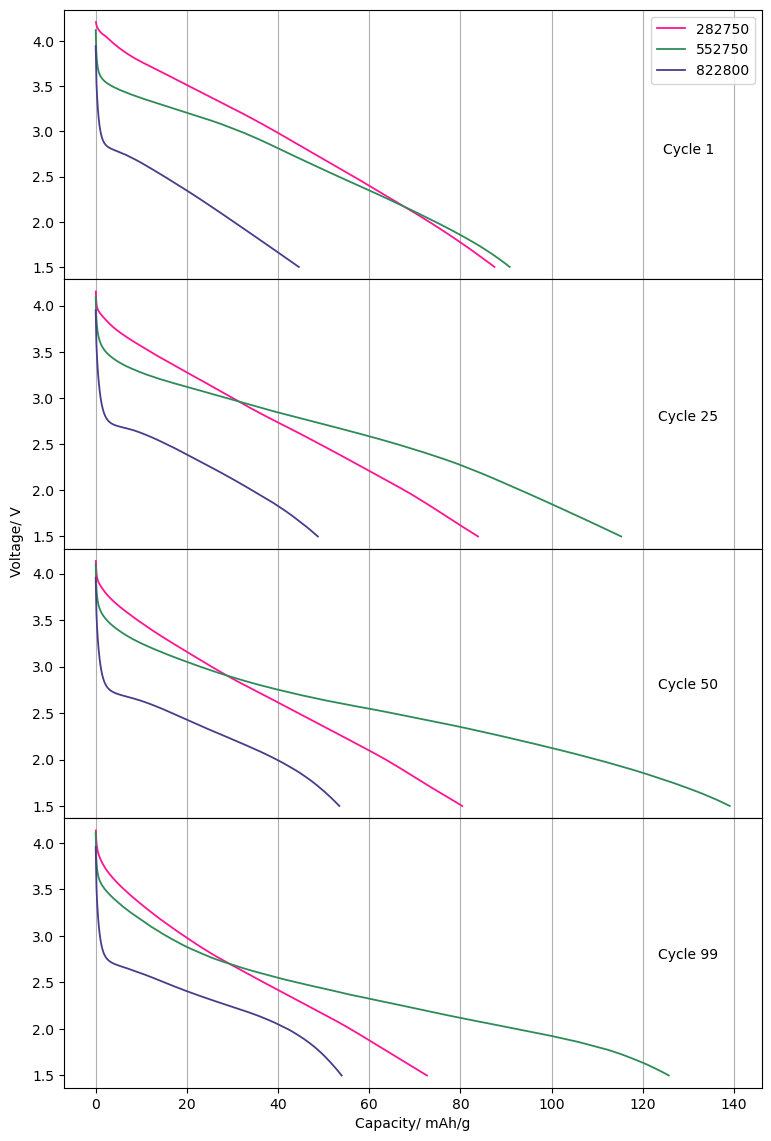

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

excel_files = ['/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/HFW_GCD_NFMMO_282750_1.5-4.3_MB1.47_NEWARE_COPYDATA.xlsx',
               '/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/HFW_GCD_552750-REDO-2_2401024_1.5-4.3_NEWARE_COPYDATA.xlsx',
               '/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/HFW_GCD_822800-REDO-1_090224_1.5-4.3_NEWARE_3-3_MB1.59_COPYDATA.xlsx',
]

column_names_col1_col2 = ['Col1', 'Col2']

column_names_col49_col50 = ['Col49', 'Col50']
column_names_col99_col100 = ['Col99', 'Col100']
column_names_col195_col196 = ['Col195', 'Col196']

colors = ['deeppink', 'seagreen', 'darkslateblue'] 

data_frames_col1_col2 = []
data_frames_col49_col50 = []
data_frames_col99_col100 = []
data_frames_col195_col196 = []
labels = []

for excel_file in excel_files:
    try:
        df = pd.read_excel(excel_file)
        
        data_col1_col2 = df[column_names_col1_col2].apply(pd.to_numeric, errors='coerce')
        max_index_col2 = data_col1_col2['Col2'].idxmax()
        data_to_plot_col1_col2 = data_col1_col2.loc[max_index_col2:]
        data_frames_col1_col2.append(data_to_plot_col1_col2)
        
        data_col49_col50 = df[column_names_col49_col50].apply(pd.to_numeric, errors='coerce')
        max_index_col50 = data_col49_col50['Col50'].idxmax()
        data_to_plot_col49_col50 = data_col49_col50.loc[max_index_col50:]
        data_frames_col49_col50.append(data_to_plot_col49_col50)
        
        data_col99_col100 = df[column_names_col99_col100].apply(pd.to_numeric, errors='coerce')
        max_index_col100 = data_col99_col100['Col100'].idxmax()
        data_to_plot_col99_col100 = data_col99_col100.loc[max_index_col100:]
        data_frames_col99_col100.append(data_to_plot_col99_col100)
        
        data_col195_col196 = df[column_names_col195_col196].apply(pd.to_numeric, errors='coerce')
        max_index_col196 = data_col195_col196['Col196'].idxmax()
        data_to_plot_col195_col196 = data_col195_col196.loc[max_index_col196:]
        data_frames_col195_col196.append(data_to_plot_col195_col196)
        
        label = re.findall(r'\d+', excel_file)
        labels.append(label[0]) 
        
    except FileNotFoundError:
        print(f"File not found at: {excel_file}")

fig, axs = plt.subplots(4, 1, sharex=True, figsize=(9, 14))  

for i, data in enumerate(data_frames_col1_col2):
    data_filtered = data[data['Col2'] <= 4.22]
    axs[0].plot(data_filtered[column_names_col1_col2[0]], data_filtered[column_names_col1_col2[1]], label=labels[i], linewidth=1.3, color=colors[i % len(colors)])  # Adjust linewidth and color here
axs[0].legend()
axs[0].text(130, 2.8, 'Cycle 1', fontsize=10, color='black', ha='center', va='center')

for i, data in enumerate(data_frames_col49_col50):
    data_filtered = data[data['Col50'] <= 4.16]
    axs[1].plot(data_filtered[column_names_col49_col50[0]], data_filtered[column_names_col49_col50[1]], label=labels[i], linewidth=1.3, color=colors[i % len(colors)])  # Adjust linewidth and color here
axs[1].text(130, 2.8, 'Cycle 25', fontsize=10, color='black', ha='center', va='center')

for i, data in enumerate(data_frames_col99_col100):
    data_filtered = data[data['Col100'] <= 4.14]
    axs[2].plot(data_filtered[column_names_col99_col100[0]], data_filtered[column_names_col99_col100[1]], label=labels[i], linewidth=1.3, color=colors[i % len(colors)])  # Adjust linewidth and color here
axs[2].text(130, 2.8, 'Cycle 50', fontsize=10, color='black', ha='center', va='center')

for i, data in enumerate(data_frames_col195_col196):
    data_filtered = data[data['Col196'] <= 4.14]
    axs[3].plot(data_filtered[column_names_col195_col196[0]], data_filtered[column_names_col195_col196[1]], label=labels[i], linewidth=1.3, color=colors[i % len(colors)])  # Adjust linewidth and color here
axs[3].text(130, 2.8, 'Cycle 99', fontsize=10, color='black', ha='center', va='center')

# Set common x-label
plt.xlabel('Capacity/ mAh/g')

fig.text(0.065, 0.5, 'Voltage/ V', va='center', rotation='vertical')

for ax in axs:
    ax.grid(axis='x')

plt.subplots_adjust(hspace=0)

#output_file = "/Users/harryfyjis-walker/Desktop/Part II Stuff/figures/750comparison.pdf"
#plt.savefig(output_file, format='pdf')

plt.show()